In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

In [31]:
data = pd.read_csv("post-operative.csv",sep = ",", names = ["L-Core","L-Surf","L-O2","L-BP","Surf-STBL","Core-STBL","BP-STBL","Comfort","Decision"])

In [32]:
data.head()

,L-Core,L-Surf,L-O2,L-BP,Surf-STBL,Core-STBL,BP-STBL,Comfort,Decision
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [34]:
L_Core_vals = ["high","mid","low"]
le=preprocessing.LabelEncoder()
le.fit(L_Core_vals)
L_Core_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(L_Core_vals_dict)

{0: 'high', 1: 'low', 2: 'mid'}


In [35]:
L_Surf_vals = ["high","mid","low"]
le=preprocessing.LabelEncoder()
le.fit(L_Core_vals)
L_Surf_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(L_Surf_vals_dict)

{0: 'high', 1: 'low', 2: 'mid'}


In [36]:
L_O2_vals = ["excellent","good"]
le=preprocessing.LabelEncoder()
le.fit(L_O2_vals)
L_O2_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(L_O2_vals_dict)

{0: 'excellent', 1: 'good'}


In [37]:
L_BP_vals = ["high","mid","low"]
le=preprocessing.LabelEncoder()
le.fit(L_BP_vals)
L_BP_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(L_BP_vals_dict)

{0: 'high', 1: 'low', 2: 'mid'}


In [38]:
surf_STBL_vals = ["stable","mod-stable","unstable"]
le=preprocessing.LabelEncoder()
le.fit(surf_STBL_vals)
surf_STBL_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(surf_STBL_vals_dict)

{0: 'mod-stable', 1: 'stable', 2: 'unstable'}


In [39]:
core_STBL_vals = ["stable","mod-stable","unstable"]
le=preprocessing.LabelEncoder()
le.fit(core_STBL_vals)
core_STBL_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(core_STBL_vals_dict)

{0: 'mod-stable', 1: 'stable', 2: 'unstable'}


In [40]:
BP_STBL_vals = ["stable","mod-stable","unstable"]
le=preprocessing.LabelEncoder()
le.fit(BP_STBL_vals)
BP_STBL_vals_dict={index: value for index, value in enumerate(le.classes_)}
print(BP_STBL_vals_dict)

{0: 'mod-stable', 1: 'stable', 2: 'unstable'}


In [41]:
number = LabelEncoder()
data["L-Core"] = number.fit_transform(data['L-Core'])
data["L-Surf"] = number.fit_transform(data['L-Surf'])
data["L-O2"] = number.fit_transform(data['L-O2'])
data["L-BP"] = number.fit_transform(data['L-BP'])
data["Surf-STBL"] = number.fit_transform(data['Surf-STBL'])
data["Core-STBL"] = number.fit_transform(data['Core-STBL'])
data["BP-STBL"] = number.fit_transform(data['BP-STBL'])
data["Comfort"] = number.fit_transform(data['Comfort'])

In [42]:
X = data[["L-Core","L-Surf","L-O2","L-BP","Surf-STBL","Core-STBL","BP-STBL","Comfort"]]
y = data["Decision"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
test_size = 0.20,
random_state = 0

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [45]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
pickle.dump(classifier, open("model.pkl", "wb"))

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [48]:
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred, normalize = True)
print(ac)

0.5217391304347826


In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  0  1]
 [ 2  0  0]
 [ 8  0  0]]


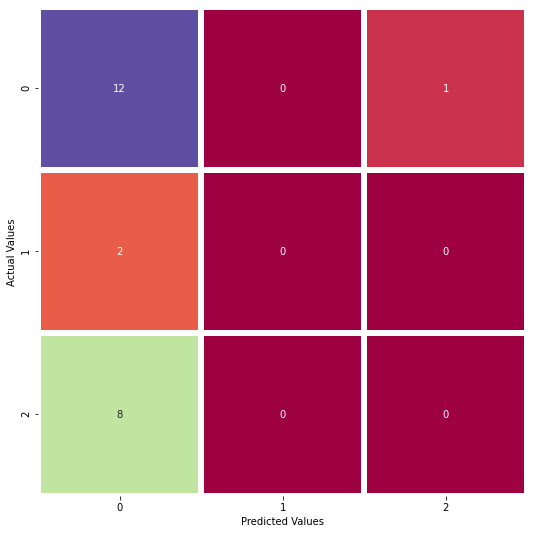

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,  linewidth = 5.0, square = True, cbar = False, cmap = "Spectral")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.55      0.92      0.69        13
           I       0.00      0.00      0.00         2
           S       0.00      0.00      0.00         8

    accuracy                           0.52        23
   macro avg       0.18      0.31      0.23        23
weighted avg       0.31      0.52      0.39        23



/Users/divyavenkatesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/divyavenkatesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/divyavenkatesan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [52]:
print(classifier.predict([[0,0,0,0,0,0,0,12]]))

['A']
